## ПР4

#### Подготовил Вадим Пацев группа ИЭоз-60-18

### Метод скользящего среднего (МСС)

In [233]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [234]:
# Данные
k = 3
df = pd.DataFrame(data={'y':[213, 171, 291, 309, 317, 362, 351, 361]})
df

,y
0,213
1,171
2,291
3,309
4,317
5,362
6,351
7,361


In [235]:
def moving_averages(arr, window_size): 
    i = 0

    moving_averages = [None]*len(arr)
    while i < len(arr) - window_size + 1:
        w = arr[i:i+window_size]
        flag = False
        for j in w:
            if math.isnan(j):
                flag = True
        if flag:
            i += 1
        else:
            window_average = round(np.sum(w) / window_size, 2)
            moving_averages[i + 1] = window_average
            i += 1
    return moving_averages

In [236]:
df['u'] = moving_averages(df['y'], k)
df

,y,u
0,213,NaN
1,171,225.00
2,291,257.00
3,309,305.67
4,317,329.33
5,362,343.33
6,351,358.00
7,361,NaN


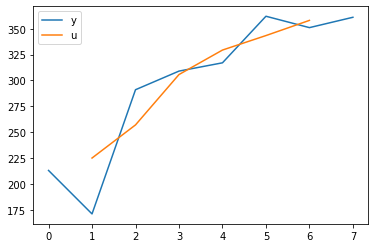

In [237]:
plt.plot(range(len(df['y'])), df['y'], label='y')
plt.plot(range(len(df['y'])), df['u'], label='u')
plt.legend()
plt.show()

### Аддитивная модель

In [238]:
k = 4
df = pd.DataFrame(data={'y': [6, 4.4, 5, 9, 7.2, 4.8, 6, 10, 8, 5.6, 6.4, 11, 9, 6.6, 7, 10.8, None,None,None,None]})
df                        

,y
0,6.0
1,4.4
2,5.0
3,9.0
4,7.2
5,4.8
6,6.0
7,10.0
8,8.0
9,5.6


#### 1. Строим график уровней ряда.

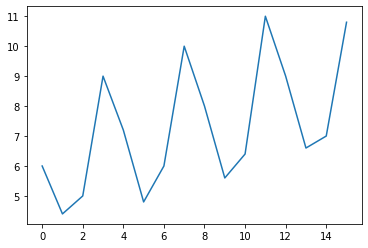

In [239]:
plt.plot(range(len(df['y'])), df['y'], label='y')
plt.show()

#### 2. Строим u1 - первое приближение тренда методом СС с окном сглаживания, равным периоду цикл составляющей.

In [240]:
df['u1'] = moving_averages(df['y'], k)
df

,y,u1
0,6.0,NaN
1,4.4,6.10
2,5.0,6.40
3,9.0,6.50
4,7.2,6.75
5,4.8,7.00
6,6.0,7.20
7,10.0,7.40
8,8.0,7.50
9,5.6,7.75


#### 3. Вычисляем u2 - второе приближение цикл составляющей получается применением к u1 МСС с окном сглаживания 2 для правильной привязки тренда к середине интервала.

In [241]:
df['u2'] = moving_averages(df['u1'], 2)
df

,y,u1,u2
0,6.0,NaN,NaN
1,4.4,6.10,NaN
2,5.0,6.40,6.25
3,9.0,6.50,6.45
4,7.2,6.75,6.62
5,4.8,7.00,6.88
6,6.0,7.20,7.10
7,10.0,7.40,7.30
8,8.0,7.50,7.45
9,5.6,7.75,7.62


#### 4. Вычисляем s1 - первое приближение циклической компоненты по формуле: s1=Y-u2

In [242]:
df['s1'] = df['y'] - df['u2']
df

,y,u1,u2,s1
0,6.0,NaN,NaN,NaN
1,4.4,6.10,NaN,NaN
2,5.0,6.40,6.25,-1.25
3,9.0,6.50,6.45,2.55
4,7.2,6.75,6.62,0.58
5,4.8,7.00,6.88,-2.08
6,6.0,7.20,7.10,-1.10
7,10.0,7.40,7.30,2.70
8,8.0,7.50,7.45,0.55
9,5.6,7.75,7.62,-2.02


#### 5. s2 получается из s1 усреднением по периодам.

In [243]:
df['s2'] = [None]*len(df['s1'])
df['s2'][2] = (df['s1'][2]+df['s1'][6]+df['s1'][10])/3
df['s2'][3] = (df['s1'][3]+df['s1'][7]+df['s1'][11])/3
df['s2'][4] = (df['s1'][4]+df['s1'][8]+df['s1'][12])/3
df['s2'][5] = (df['s1'][5]+df['s1'][9]+df['s1'][13])/3
df

,y,u1,u2,s1,s2
0,6.0,NaN,NaN,NaN,None
1,4.4,6.10,NaN,NaN,None
2,5.0,6.40,6.25,-1.25,-1.276667
3,9.0,6.50,6.45,2.55,2.71
4,7.2,6.75,6.62,0.58,0.603333
5,4.8,7.00,6.88,-2.08,-1.96
6,6.0,7.20,7.10,-1.10,None
7,10.0,7.40,7.30,2.70,None
8,8.0,7.50,7.45,0.55,None
9,5.6,7.75,7.62,-2.02,None


In [244]:
s_r = df['s2'].mean()
s_r

0.01916666666666661

#### 6. s3 получается из s2 выравниванием (приведением к среднему за период, равному 0).

In [245]:
df['s3'] =  df['s2'] - s_r
df

,y,u1,u2,s1,s2,s3
0,6.0,NaN,NaN,NaN,None,NaN
1,4.4,6.10,NaN,NaN,None,NaN
2,5.0,6.40,6.25,-1.25,-1.276667,-1.295833
3,9.0,6.50,6.45,2.55,2.71,2.690833
4,7.2,6.75,6.62,0.58,0.603333,0.584167
5,4.8,7.00,6.88,-2.08,-1.96,-1.979167
6,6.0,7.20,7.10,-1.10,None,NaN
7,10.0,7.40,7.30,2.70,None,NaN
8,8.0,7.50,7.45,0.55,None,NaN
9,5.6,7.75,7.62,-2.02,None,NaN


#### 7. S получается копированием s3 на другие периоды.

In [246]:
df['S']= df['s3']
df['S'][0] = df['s3'][4]
df['S'][1] = df['s3'][5]
df['S'][6] = df['s3'][2]
df['S'][7] = df['s3'][3]
df['S'][8] = df['s3'][4]
df['S'][9] = df['s3'][5]
df['S'][10] = df['s3'][2]
df['S'][11] = df['s3'][3]
df['S'][12] = df['s3'][4]
df['S'][13] = df['s3'][5]
df['S'][14] = df['s3'][2]
df['S'][15] = df['s3'][3]
df['S'][16] = df['s3'][4]
df['S'][17] = df['s3'][5]
df['S'][18] = df['s3'][2]
df['S'][19] = df['s3'][3]
df

,y,u1,u2,s1,s2,s3,S
0,6.0,NaN,NaN,NaN,None,NaN,0.584167
1,4.4,6.10,NaN,NaN,None,NaN,-1.979167
2,5.0,6.40,6.25,-1.25,-1.276667,-1.295833,-1.295833
3,9.0,6.50,6.45,2.55,2.71,2.690833,2.690833
4,7.2,6.75,6.62,0.58,0.603333,0.584167,0.584167
5,4.8,7.00,6.88,-2.08,-1.96,-1.979167,-1.979167
6,6.0,7.20,7.10,-1.10,None,NaN,-1.295833
7,10.0,7.40,7.30,2.70,None,NaN,2.690833
8,8.0,7.50,7.45,0.55,None,NaN,0.584167
9,5.6,7.75,7.62,-2.02,None,NaN,-1.979167


#### 8. Вычисляем зашумленный тренд: T+E=Y-S

In [247]:
df['T+E']= df['y'] - df['S']
df

,y,u1,u2,s1,s2,s3,S,T+E
0,6.0,NaN,NaN,NaN,None,NaN,0.584167,5.415833
1,4.4,6.10,NaN,NaN,None,NaN,-1.979167,6.379167
2,5.0,6.40,6.25,-1.25,-1.276667,-1.295833,-1.295833,6.295833
3,9.0,6.50,6.45,2.55,2.71,2.690833,2.690833,6.309167
4,7.2,6.75,6.62,0.58,0.603333,0.584167,0.584167,6.615833
5,4.8,7.00,6.88,-2.08,-1.96,-1.979167,-1.979167,6.779167
6,6.0,7.20,7.10,-1.10,None,NaN,-1.295833,7.295833
7,10.0,7.40,7.30,2.70,None,NaN,2.690833,7.309167
8,8.0,7.50,7.45,0.55,None,NaN,0.584167,7.415833
9,5.6,7.75,7.62,-2.02,None,NaN,-1.979167,7.579167


#### 9. Определяем оценку параметров тренда по МНК: T=(m^)*x+(b^)

In [248]:
est = sm.OLS(df['y'][:-4], sm.add_constant(range(len(df['y'])-4))).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.983
Date:                Fri, 03 Jun 2022   Prob (F-statistic):             0.0424
Time:                        14:44:37   Log-Likelihood:                -31.738
No. Observations:                  16   AIC:                             67.48
Df Residuals:                      14   BIC:                             69.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5926      0.898      6.230      0.0

In [249]:
print("Оценка коэфициента регрессии m^=", est.params[1])
print("Оценка сдвига b^=", est.params[0])

Оценка коэфициента регрессии m^= 0.22764705882352948
Оценка сдвига b^= 5.59264705882353


#### 10. Расчет тренда по формуле T=(m^)*x+(b^)

In [250]:
df['T']= range(len(df['y']))* est.params[1] + est.params[0]
df

,y,u1,u2,s1,s2,s3,S,T+E,T
0,6.0,NaN,NaN,NaN,None,NaN,0.584167,5.415833,5.592647
1,4.4,6.10,NaN,NaN,None,NaN,-1.979167,6.379167,5.820294
2,5.0,6.40,6.25,-1.25,-1.276667,-1.295833,-1.295833,6.295833,6.047941
3,9.0,6.50,6.45,2.55,2.71,2.690833,2.690833,6.309167,6.275588
4,7.2,6.75,6.62,0.58,0.603333,0.584167,0.584167,6.615833,6.503235
5,4.8,7.00,6.88,-2.08,-1.96,-1.979167,-1.979167,6.779167,6.730882
6,6.0,7.20,7.10,-1.10,None,NaN,-1.295833,7.295833,6.958529
7,10.0,7.40,7.30,2.70,None,NaN,2.690833,7.309167,7.186176
8,8.0,7.50,7.45,0.55,None,NaN,0.584167,7.415833,7.413824
9,5.6,7.75,7.62,-2.02,None,NaN,-1.979167,7.579167,7.641471


#### Расчет возмущений: E=(T+E)-T

In [251]:
df['E']= df['T+E'] - df['T']
df

,y,u1,u2,s1,s2,s3,S,T+E,T,E
0,6.0,NaN,NaN,NaN,None,NaN,0.584167,5.415833,5.592647,-0.176814
1,4.4,6.10,NaN,NaN,None,NaN,-1.979167,6.379167,5.820294,0.558873
2,5.0,6.40,6.25,-1.25,-1.276667,-1.295833,-1.295833,6.295833,6.047941,0.247892
3,9.0,6.50,6.45,2.55,2.71,2.690833,2.690833,6.309167,6.275588,0.033578
4,7.2,6.75,6.62,0.58,0.603333,0.584167,0.584167,6.615833,6.503235,0.112598
5,4.8,7.00,6.88,-2.08,-1.96,-1.979167,-1.979167,6.779167,6.730882,0.048284
6,6.0,7.20,7.10,-1.10,None,NaN,-1.295833,7.295833,6.958529,0.337304
7,10.0,7.40,7.30,2.70,None,NaN,2.690833,7.309167,7.186176,0.12299
8,8.0,7.50,7.45,0.55,None,NaN,0.584167,7.415833,7.413824,0.00201
9,5.6,7.75,7.62,-2.02,None,NaN,-1.979167,7.579167,7.641471,-0.062304


Так как |E|<<|S|, |E|<<|T|, то модель  качественная.

#### Прогноз Y на следующий год: Y прогноз=T+S.

In [252]:
df['y'][16] = df['T'][16] + df['S'][16]
df['y'][17] = df['T'][17] + df['S'][17]
df['y'][18] = df['T'][18] + df['S'][18]
df['y'][19] = df['T'][19] + df['S'][19]
df

,y,u1,u2,s1,s2,s3,S,T+E,T,E
0,6.000000,NaN,NaN,NaN,None,NaN,0.584167,5.415833,5.592647,-0.176814
1,4.400000,6.10,NaN,NaN,None,NaN,-1.979167,6.379167,5.820294,0.558873
2,5.000000,6.40,6.25,-1.25,-1.276667,-1.295833,-1.295833,6.295833,6.047941,0.247892
3,9.000000,6.50,6.45,2.55,2.71,2.690833,2.690833,6.309167,6.275588,0.033578
4,7.200000,6.75,6.62,0.58,0.603333,0.584167,0.584167,6.615833,6.503235,0.112598
5,4.800000,7.00,6.88,-2.08,-1.96,-1.979167,-1.979167,6.779167,6.730882,0.048284
6,6.000000,7.20,7.10,-1.10,None,NaN,-1.295833,7.295833,6.958529,0.337304
7,10.000000,7.40,7.30,2.70,None,NaN,2.690833,7.309167,7.186176,0.12299
8,8.000000,7.50,7.45,0.55,None,NaN,0.584167,7.415833,7.413824,0.00201
9,5.600000,7.75,7.62,-2.02,None,NaN,-1.979167,7.579167,7.641471,-0.062304


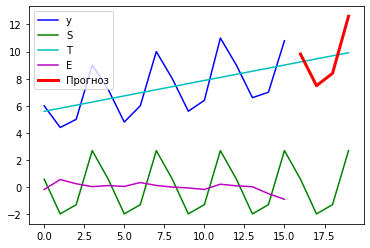

In [253]:
keys = [('y', 'b'), ('S', 'g'), ('T', 'c'), ('E', 'm')]
for key, color in keys:
    if key == 'y':
        plt.plot(range(len(df['y'])-4), df[key][:-4], color, label=key)
    else:
        plt.plot(range(len(df['y'])), df[key], color, label=key)
plt.plot([16,17,18,19], df['y'][-4:], 'r', linewidth=3, label='Прогноз')
plt.legend()
plt.show()

### Мультипликативная

In [254]:
k = 4
df = pd.DataFrame(data={'y': [72,100,90,64,70,92,80,58,62,80,68,48,52,60,50,30, None,None,None,None]})
df                        

,y
0,72.0
1,100.0
2,90.0
3,64.0
4,70.0
5,92.0
6,80.0
7,58.0
8,62.0
9,80.0


#### 1. Строим график уровней ряда.

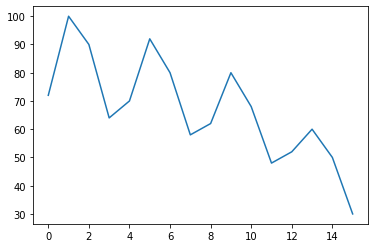

In [255]:
plt.plot(range(len(df['y'])), df['y'], label='y')
plt.show()

#### 2. Строим u1 - первое приближение тренда методом СС с окном сглаживания, равным периоду цикл составляющей.

In [256]:
df['u1'] = moving_averages(df['y'], k)
df

,y,u1
0,72.0,NaN
1,100.0,81.5
2,90.0,81.0
3,64.0,79.0
4,70.0,76.5
5,92.0,75.0
6,80.0,73.0
7,58.0,70.0
8,62.0,67.0
9,80.0,64.5


#### 3. Вычисляем u2 - второе приближение цикл составляющей получается применением к u1 МСС с окном сглаживания 2 для правильной привязки тренда к середине интервала.

In [257]:
df['u2'] = moving_averages(df['u1'], 2)
df

,y,u1,u2
0,72.0,NaN,NaN
1,100.0,81.5,NaN
2,90.0,81.0,81.25
3,64.0,79.0,80.00
4,70.0,76.5,77.75
5,92.0,75.0,75.75
6,80.0,73.0,74.00
7,58.0,70.0,71.50
8,62.0,67.0,68.50
9,80.0,64.5,65.75


#### 4. Вычисляем s1 - первое приближение циклической компоненты по формуле: s1=Y/u2

In [258]:
df['s1'] = df['y'] / df['u2']
df

,y,u1,u2,s1
0,72.0,NaN,NaN,NaN
1,100.0,81.5,NaN,NaN
2,90.0,81.0,81.25,1.107692
3,64.0,79.0,80.00,0.800000
4,70.0,76.5,77.75,0.900322
5,92.0,75.0,75.75,1.214521
6,80.0,73.0,74.00,1.081081
7,58.0,70.0,71.50,0.811189
8,62.0,67.0,68.50,0.905109
9,80.0,64.5,65.75,1.216730


#### 5. s2 получается из s1 усреднением по периодам.

In [259]:
df['s2'] = [None]*len(df['s1'])
df['s2'][2] = (df['s1'][2]+df['s1'][6]+df['s1'][10])/3
df['s2'][3] = (df['s1'][3]+df['s1'][7]+df['s1'][11])/3
df['s2'][4] = (df['s1'][4]+df['s1'][8]+df['s1'][12])/3
df['s2'][5] = (df['s1'][5]+df['s1'][9]+df['s1'][13])/3
df

,y,u1,u2,s1,s2
0,72.0,NaN,NaN,NaN,None
1,100.0,81.5,NaN,NaN,None
2,90.0,81.0,81.25,1.107692,1.087957
3,64.0,79.0,80.00,0.800000,0.805971
4,70.0,76.5,77.75,0.900322,0.918401
5,92.0,75.0,75.75,1.214521,1.208427
6,80.0,73.0,74.00,1.081081,None
7,58.0,70.0,71.50,0.811189,None
8,62.0,67.0,68.50,0.905109,None
9,80.0,64.5,65.75,1.216730,None


In [260]:
s_r = df['s2'].mean()
s_r

1.0051889805115457

#### 6. s3 получается из s2 выравниванием (приведением к среднему за период, равному 0).

In [261]:
df['s3'] =  df['s2'] / s_r
df

,y,u1,u2,s1,s2,s3
0,72.0,NaN,NaN,NaN,None,NaN
1,100.0,81.5,NaN,NaN,None,NaN
2,90.0,81.0,81.25,1.107692,1.087957,1.082341
3,64.0,79.0,80.00,0.800000,0.805971,0.80181
4,70.0,76.5,77.75,0.900322,0.918401,0.91366
5,92.0,75.0,75.75,1.214521,1.208427,1.202189
6,80.0,73.0,74.00,1.081081,None,NaN
7,58.0,70.0,71.50,0.811189,None,NaN
8,62.0,67.0,68.50,0.905109,None,NaN
9,80.0,64.5,65.75,1.216730,None,NaN


#### 7. S получается копированием s3 на другие периоды.

In [262]:
df['S']= df['s3']
df['S'][0] = df['s3'][4]
df['S'][1] = df['s3'][5]
df['S'][6] = df['s3'][2]
df['S'][7] = df['s3'][3]
df['S'][8] = df['s3'][4]
df['S'][9] = df['s3'][5]
df['S'][10] = df['s3'][2]
df['S'][11] = df['s3'][3]
df['S'][12] = df['s3'][4]
df['S'][13] = df['s3'][5]
df['S'][14] = df['s3'][2]
df['S'][15] = df['s3'][3]
df['S'][16] = df['s3'][4]
df['S'][17] = df['s3'][5]
df['S'][18] = df['s3'][2]
df['S'][19] = df['s3'][3]
df

,y,u1,u2,s1,s2,s3,S
0,72.0,NaN,NaN,NaN,None,NaN,0.91366
1,100.0,81.5,NaN,NaN,None,NaN,1.202189
2,90.0,81.0,81.25,1.107692,1.087957,1.082341,1.082341
3,64.0,79.0,80.00,0.800000,0.805971,0.80181,0.80181
4,70.0,76.5,77.75,0.900322,0.918401,0.91366,0.91366
5,92.0,75.0,75.75,1.214521,1.208427,1.202189,1.202189
6,80.0,73.0,74.00,1.081081,None,NaN,1.082341
7,58.0,70.0,71.50,0.811189,None,NaN,0.80181
8,62.0,67.0,68.50,0.905109,None,NaN,0.91366
9,80.0,64.5,65.75,1.216730,None,NaN,1.202189


#### 8. Вычисляем зашумленный тренд: T+E=Y/S

In [263]:
df['T*E']= df['y'] / df['S']
df

,y,u1,u2,s1,s2,s3,S,T*E
0,72.0,NaN,NaN,NaN,None,NaN,0.91366,78.803936
1,100.0,81.5,NaN,NaN,None,NaN,1.202189,83.181598
2,90.0,81.0,81.25,1.107692,1.087957,1.082341,1.082341,83.153079
3,64.0,79.0,80.00,0.800000,0.805971,0.80181,0.80181,79.819416
4,70.0,76.5,77.75,0.900322,0.918401,0.91366,0.91366,76.614938
5,92.0,75.0,75.75,1.214521,1.208427,1.202189,1.202189,76.52707
6,80.0,73.0,74.00,1.081081,None,NaN,1.082341,73.913848
7,58.0,70.0,71.50,0.811189,None,NaN,0.80181,72.336346
8,62.0,67.0,68.50,0.905109,None,NaN,0.91366,67.858945
9,80.0,64.5,65.75,1.216730,None,NaN,1.202189,66.545278


#### 9. Определяем оценку параметров тренда по МНК: T=(m^)*x+(b^)

In [264]:
est = sm.OLS(df['y'][:-4], sm.add_constant(range(len(df['y'])-4))).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     19.22
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           0.000624
Time:                        14:44:44   Log-Likelihood:                -61.784
No. Observations:                  16   AIC:                             127.6
Df Residuals:                      14   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.1765      5.871     15.189      0.0

In [265]:
print("Оценка коэфициента регрессии m^=", est.params[1])
print("Оценка сдвига b^=", est.params[0])

Оценка коэфициента регрессии m^= -2.923529411764707
Оценка сдвига b^= 89.17647058823533


#### 10. Расчет тренда по формуле T=(m^)*x+(b^)

In [266]:
df['T']= range(len(df['y']))* est.params[1] + est.params[0]
df

,y,u1,u2,s1,s2,s3,S,T*E,T
0,72.0,NaN,NaN,NaN,None,NaN,0.91366,78.803936,89.176471
1,100.0,81.5,NaN,NaN,None,NaN,1.202189,83.181598,86.252941
2,90.0,81.0,81.25,1.107692,1.087957,1.082341,1.082341,83.153079,83.329412
3,64.0,79.0,80.00,0.800000,0.805971,0.80181,0.80181,79.819416,80.405882
4,70.0,76.5,77.75,0.900322,0.918401,0.91366,0.91366,76.614938,77.482353
5,92.0,75.0,75.75,1.214521,1.208427,1.202189,1.202189,76.52707,74.558824
6,80.0,73.0,74.00,1.081081,None,NaN,1.082341,73.913848,71.635294
7,58.0,70.0,71.50,0.811189,None,NaN,0.80181,72.336346,68.711765
8,62.0,67.0,68.50,0.905109,None,NaN,0.91366,67.858945,65.788235
9,80.0,64.5,65.75,1.216730,None,NaN,1.202189,66.545278,62.864706


#### Расчет возмущений: E=(T*E)/T

In [267]:
df['E']= df['T*E'] / df['T']
df

,y,u1,u2,s1,s2,s3,S,T*E,T,E
0,72.0,NaN,NaN,NaN,None,NaN,0.91366,78.803936,89.176471,0.883685
1,100.0,81.5,NaN,NaN,None,NaN,1.202189,83.181598,86.252941,0.964391
2,90.0,81.0,81.25,1.107692,1.087957,1.082341,1.082341,83.153079,83.329412,0.997884
3,64.0,79.0,80.00,0.800000,0.805971,0.80181,0.80181,79.819416,80.405882,0.992706
4,70.0,76.5,77.75,0.900322,0.918401,0.91366,0.91366,76.614938,77.482353,0.988805
5,92.0,75.0,75.75,1.214521,1.208427,1.202189,1.202189,76.52707,74.558824,1.026399
6,80.0,73.0,74.00,1.081081,None,NaN,1.082341,73.913848,71.635294,1.031808
7,58.0,70.0,71.50,0.811189,None,NaN,0.80181,72.336346,68.711765,1.052751
8,62.0,67.0,68.50,0.905109,None,NaN,0.91366,67.858945,65.788235,1.031475
9,80.0,64.5,65.75,1.216730,None,NaN,1.202189,66.545278,62.864706,1.058548


Так как |E-1|<<|S-1|, то модель  качественная.

#### Расчет абсолютной погрешности: Eabs=|Y-T*S|

In [268]:
df['Eabs']= np.abs(df['y']-df['T']*df['S'])
df

,y,u1,u2,s1,s2,s3,S,T*E,T,E,Eabs
0,72.0,NaN,NaN,NaN,None,NaN,0.91366,78.803936,89.176471,0.883685,9.476969
1,100.0,81.5,NaN,NaN,None,NaN,1.202189,83.181598,86.252941,0.964391,3.692335
2,90.0,81.0,81.25,1.107692,1.087957,1.082341,1.082341,83.153079,83.329412,0.997884,0.190852
3,64.0,79.0,80.00,0.800000,0.805971,0.80181,0.80181,79.819416,80.405882,0.992706,0.470234
4,70.0,76.5,77.75,0.900322,0.918401,0.91366,0.91366,76.614938,77.482353,0.988805,0.792522
5,92.0,75.0,75.75,1.214521,1.208427,1.202189,1.202189,76.52707,74.558824,1.026399,2.366204
6,80.0,73.0,74.00,1.081081,None,NaN,1.082341,73.913848,71.635294,1.031808,2.466173
7,58.0,70.0,71.50,0.811189,None,NaN,0.80181,72.336346,68.711765,1.052751,2.906225
8,62.0,67.0,68.50,0.905109,None,NaN,0.91366,67.858945,65.788235,1.031475,1.891925
9,80.0,64.5,65.75,1.216730,None,NaN,1.202189,66.545278,62.864706,1.058548,4.424743


Так как Eabs<<|Y|, и Eabs<<|T|  то модель  качественная.

#### Прогноз Y на следующий год: Y прогноз=T*S.

In [269]:
df['y'][16] = df['T'][16] * df['S'][16]
df['y'][17] = df['T'][17] * df['S'][17]
df['y'][18] = df['T'][18] * df['S'][18]
df['y'][19] = df['T'][19] * df['S'][19]
df

,y,u1,u2,s1,s2,s3,S,T*E,T,E,Eabs
0,72.000000,NaN,NaN,NaN,None,NaN,0.91366,78.803936,89.176471,0.883685,9.476969
1,100.000000,81.5,NaN,NaN,None,NaN,1.202189,83.181598,86.252941,0.964391,3.692335
2,90.000000,81.0,81.25,1.107692,1.087957,1.082341,1.082341,83.153079,83.329412,0.997884,0.190852
3,64.000000,79.0,80.00,0.800000,0.805971,0.80181,0.80181,79.819416,80.405882,0.992706,0.470234
4,70.000000,76.5,77.75,0.900322,0.918401,0.91366,0.91366,76.614938,77.482353,0.988805,0.792522
5,92.000000,75.0,75.75,1.214521,1.208427,1.202189,1.202189,76.52707,74.558824,1.026399,2.366204
6,80.000000,73.0,74.00,1.081081,None,NaN,1.082341,73.913848,71.635294,1.031808,2.466173
7,58.000000,70.0,71.50,0.811189,None,NaN,0.80181,72.336346,68.711765,1.052751,2.906225
8,62.000000,67.0,68.50,0.905109,None,NaN,0.91366,67.858945,65.788235,1.031475,1.891925
9,80.000000,64.5,65.75,1.216730,None,NaN,1.202189,66.545278,62.864706,1.058548,4.424743


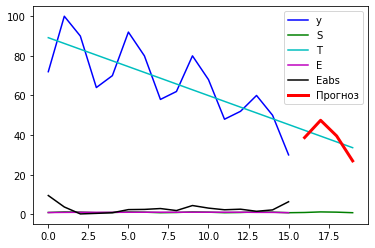

In [270]:
keys = [('y', 'b'), ('S', 'g'), ('T', 'c'), ('E', 'm'), ('Eabs', 'k')]
for key, color in keys:
    if key == 'y':
        plt.plot(range(len(df['y'])-4), df[key][:-4], color, label=key)
    else:
        plt.plot(range(len(df['y'])), df[key], color, label=key)
plt.plot([16,17,18,19], df['y'][-4:], 'r', linewidth=3, label='Прогноз')
plt.legend()
plt.show()